In [71]:
import matplotlib
matplotlib.use('Agg')  # Backend non-interactif
%matplotlib inline

import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import astropy.units as u
import random
import pandas as pd
import copy
import json

from textwrap import fill
from astropy.table import Table, vstack, Column
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.coordinates import search_around_sky
from matplotlib.patches import Rectangle
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
from astropy.coordinates import angular_separation
import astropy.units as u
from astropy.table import join
from collections import Counter
from matplotlib.colors import LogNorm
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize

from constantes import LIM_FLUX_CLUSTER, LIM_FLUX_AGN, SEARCH_RADIUS_CLUSTER, SEARCH_RADIUS_AGN, EXT_LIKE_C1, EXT_LIKE_C2, EXT_C1_C2, EXT_LIKE_C1_new, EXT_LIKE_C2_new, EXT_C1_C2_new

from constantes import print_parameters

print_parameters()


╭─────────────────────────────────────────────╮
│                  PARAMÈTRES                 │
├─────────────────────────────────────────────┤
│ LIM_FLUX_CLUSTER      : 1.00e-15 erg/cm²/s 
│ LIM_FLUX_AGN          : 1.00e-15 erg/cm²/s 
│ SEARCH_RADIUS_CLUSTER : 30.00    arcsec    
│ SEARCH_RADIUS_AGN     : 10.00    arcsec    
│ EXT_LIKE_C1           : 33       
│ EXT_LIKE_C2           : 15       
│ EXT_C1_C2             : 5        
│ EXT_LIKE_C1_new       : 80       
│ EXT_LIKE_C2_new       : 35       
│ EXT_C1_C2_new         : 13       
│ window_size           : 7.0      arcmin    
│ PNT_DET_ML_SPURIOUS   : 20       
│ EXT_LIKE_SPURIOUS     : 15       
╰─────────────────────────────────────────────╯


In [72]:
#catalog_path_befXamin_sim2 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation2/fsII_25_lensed_AGN1/XFSII_25_p18_b05rc02_lensed_1e13Mo_output_cleaned.fits')
catalog_path_aftXamin_sim2 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation2/fsII_25_lensed_AGN1/Xamin_onlyMOSPN/merged_catalog_cleaned.fits')
#catalog_path_AGN_sim2      = os.path.expanduser('~/Documents/TransformerProject/data/Simulation2/fsII_25_lensed_AGN1/FS2_MAMBO_AGN_1.fits')

#catalog_path_befXamin_sim3 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation3/fsII_25_lensed_AGN2/XFSII_25_p18_b05rc02_lensed_1e13Mo_output_cleaned.fits')
catalog_path_aftXamin_sim3 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation3/fsII_25_lensed_AGN2/Xamin_onlyMOSPN/merged_catalog_cleaned.fits')
#catalog_path_AGN_sim3      = os.path.expanduser('~/Documents/TransformerProject/data/Simulation3/fsII_25_lensed_AGN2/FS2_MAMBO_AGN_2.fits')


In [73]:
data_aftXamin_sim2 = Table.read(catalog_path_aftXamin_sim2)
data_aftXamin_sim3 = Table.read(catalog_path_aftXamin_sim3)

In [74]:
# Chargement des tables
path_match_clusters_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
path_match_AGN_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/AGN_matches_r{SEARCH_RADIUS_AGN*3600:.0f}arcsec_flux{LIM_FLUX_AGN}_40ks_filtered.fits')
path_spurious_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/Spurious_40ks.fits')

data_match_clusters_sim2 = Table.read(path_match_clusters_sim2)
data_match_AGN_sim2 = Table.read(path_match_AGN_sim2)
data_CRABES_sim2 = Table.read(path_spurious_sim2)

print("\n*** Simulation 2 *** ")
print(f"Amas: {len(data_match_clusters_sim2)}")
print(f"AGN: {len(data_match_AGN_sim2)}")
print(f"Crabes: {len(data_CRABES_sim2)}")

# Chargement des tables
path_match_clusters_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
path_match_AGN_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/AGN_matches_r{SEARCH_RADIUS_AGN*3600:.0f}arcsec_flux{LIM_FLUX_AGN}_40ks_filtered.fits')
path_spurious_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/Spurious_40ks.fits')

data_match_clusters_sim3 = Table.read(path_match_clusters_sim3)
data_match_AGN_sim3 = Table.read(path_match_AGN_sim3)
data_CRABES_sim3 = Table.read(path_spurious_sim3)

print("\n *** Simulation 3 *** ")
print(f"Amas: {len(data_match_clusters_sim3)}")
print(f"AGN: {len(data_match_AGN_sim3)}")
print(f"Crabes: {len(data_CRABES_sim3)}")


*** Simulation 2 *** 
Amas: 1076
AGN: 30276
Crabes: 15161

 *** Simulation 3 *** 
Amas: 1108
AGN: 30674
Crabes: 15305


In [75]:
min_val2 = data_aftXamin_sim2['ID_Xamin'].min()
max_val2 = data_aftXamin_sim2['ID_Xamin'].max()
print(f"ID_Xamin - Min: {min_val2}, Max: {max_val2}")

min_val3 = data_aftXamin_sim3['ID_Xamin'].min()
max_val3 = data_aftXamin_sim3['ID_Xamin'].max()
print(f"ID_Xamin - Min: {min_val3}, Max: {max_val3}")

print(f"\nNouvel indicage:")

# De combien on re-indice ID_Xamin
NbreSources2 = max_val2 + 1

# Simulation 3
data_aftXamin_sim3['ID_Xamin'] += NbreSources2
data_match_clusters_sim3['ID_Xamin'] += NbreSources2
data_match_AGN_sim3['ID_Xamin'] += NbreSources2
data_CRABES_sim3['ID_Xamin'] += NbreSources2

min_val2 = data_aftXamin_sim2['ID_Xamin'].min()
max_val2 = data_aftXamin_sim2['ID_Xamin'].max()
print(f"ID_Xamin - Min: {min_val2}, Max: {max_val2}")

min_val3 = data_aftXamin_sim3['ID_Xamin'].min()
max_val3 = data_aftXamin_sim3['ID_Xamin'].max()
print(f"ID_Xamin - Min: {min_val3}, Max: {max_val3}")

ID_Xamin - Min: 0, Max: 46512
ID_Xamin - Min: 0, Max: 47086

Nouvel indicage:
ID_Xamin - Min: 0, Max: 46512
ID_Xamin - Min: 46513, Max: 93599


In [76]:
data_match_AGN_sim2.rename_column('Fx_05_2', 'Fx_s_G14')
data_match_AGN_sim3.rename_column('Fx_05_2', 'Fx_s_G14')

In [77]:
noms_colonnes_Xamin = data_aftXamin_sim2.colnames
print(noms_colonnes_Xamin)

Colonnes_utiles_AMAS = noms_colonnes_Xamin + ['R.A.', 'Dec', 'flux_ABS']
Colonnes_utiles_AGN = noms_colonnes_Xamin + ['ra', 'dec', 'Fx_s_G14']

['BOX_ID_SRC', 'INST0', 'BAND0', 'INST1', 'BAND1', 'INST0_EXP', 'INST1_EXP', 'INST0_GAPFLAG', 'INST1_GAPFLAG', 'GAP_NEIGHBOUR', 'INPUT_X_IMA', 'INPUT_Y_IMA', 'PNT_DET_ML', 'EXT_DET_ML', 'EPN_DET_ML', 'DBL_DET_ML', 'EPN_ML_EXT', 'PNT_X_IMA', 'PNT_X_IMA_ERR', 'PNT_Y_IMA', 'PNT_IMA_ERR', 'PNT_RA', 'PNT_DEC', 'PNT_RADEC_ERR', 'PNT_RATE_MOS', 'PNT_RATE_MOS_ERR', 'PNT_RATE_PN', 'PNT_RATE_PN_ERR', 'PNT_SCTS_MOS', 'PNT_SCTS_MOS_ERR', 'PNT_SCTS_PN', 'PNT_SCTS_PN_ERR', 'PNT_BG_MAP_MOS', 'PNT_BG_MAP_PN', 'PNT_PIX_DEV', 'PNT_N_ITER', 'PNT_CUTRAD', 'EXT_LIKE', 'EXT', 'EXT_ERR', 'EXT_X_IMA', 'EXT_X_IMA_ERR', 'EXT_Y_IMA', 'EXT_Y_IMA_ERR', 'EXT_RA', 'EXT_DEC', 'EXT_RADEC_ERR', 'EXT_RATE_MOS', 'EXT_RATE_MOS_ERR', 'EXT_RATE_PN', 'EXT_RATE_PN_ERR', 'EXT_SCTS_MOS', 'EXT_SCTS_MOS_ERR', 'EXT_SCTS_PN', 'EXT_SCTS_PN_ERR', 'EXT_BG_MAP_MOS', 'EXT_BG_MAP_PN', 'EXT_PIX_DEV', 'EXT_N_ITER', 'EXT_CUTRAD', 'EPN_LIKE_EXT', 'EPN_LIKE_PNT', 'EPN_EXT', 'EPN_EXT_ERR', 'EPN_RATIO', 'EPN_RATIO_ERR', 'EPN_X_IMA', 'EPN_X_IMA_

In [78]:
data_match_clusters_sim2 = data_match_clusters_sim2[Colonnes_utiles_AMAS]
data_match_clusters_sim3 = data_match_clusters_sim3[Colonnes_utiles_AMAS]

data_match_AGN_sim2 = data_match_AGN_sim2[Colonnes_utiles_AGN]
data_match_AGN_sim3 = data_match_AGN_sim3[Colonnes_utiles_AGN]

In [79]:
data_aftXamin       = vstack([data_aftXamin_sim2, data_aftXamin_sim3])
data_match_clusters = vstack([data_match_clusters_sim2, data_match_clusters_sim3])
data_match_AGN      = vstack([data_match_AGN_sim2, data_match_AGN_sim3])
data_CRABES         = vstack([data_CRABES_sim2, data_CRABES_sim3])

In [80]:
data_aftXamin.meta.clear()
data_match_clusters.meta.clear()
data_match_AGN.meta.clear()
data_CRABES.meta.clear()

In [81]:
print(f'Xamin : {len(data_aftXamin)}')
print(f'Amas : {len(data_match_clusters)}')
print(f'AGN : {len(data_match_AGN)}')
print(f'Spurious : {len(data_CRABES)}')

print(f'\nTout va bien? {len(data_aftXamin) == len(data_match_clusters)+len(data_match_AGN)+len(data_CRABES)}')

Xamin : 93600
Amas : 2184
AGN : 60950
Spurious : 30466

Tout va bien? True


# **Enregistrement des fichiers empiles**

# Xamin

In [82]:
output_filename = f"Xamin_stacked_files.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_aftXamin.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Xamin stacked files from different simulations'
    hdr['N_MATCH'] = (len(data_aftXamin), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_aftXamin)} lignes x {len(data_aftXamin.columns)} colonnes")

Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Xamin_stacked_files.fits
Dimensions : 93600 lignes x 113 colonnes


# Amas

In [83]:
output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters)} lignes x {len(data_match_clusters.columns)} colonnes")

Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks.fits
Dimensions : 2184 lignes x 116 colonnes


# AGN

In [84]:
output_filename = f"AGN_matches_r{SEARCH_RADIUS_AGN*3600:.0f}arcsec_flux{LIM_FLUX_AGN}_40ks.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_AGN.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input AGN - Output pipeline spatially matched source catalog'
    hdr['R_MATCH'] = (SEARCH_RADIUS_AGN*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_AGN), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_AGN)} lignes x {len(data_match_AGN.columns)} colonnes")

Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/AGN_matches_r10arcsec_flux1e-15_40ks.fits
Dimensions : 60950 lignes x 116 colonnes


# Fausses sources

In [85]:
output_filename = f"Spurious_40ks.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_CRABES.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Output pipeline spatially not matched with source catalog of Clusters or AGN'
    hdr['N_MATCH'] = (len(data_CRABES), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_CRABES)} lignes x {len(data_CRABES.columns)} colonnes")

Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Spurious_40ks.fits
Dimensions : 30466 lignes x 114 colonnes


# **Calcul completude**

Completude de la selection C1 et C2 calculee sans prendre en compte le defaut de completude apportee par le pipeline

In [86]:
# Définition des classes C1 et C2
cond_C1 = np.logical_and((data_match_clusters['EXT'] > EXT_C1_C2) , (data_match_clusters['EXT_LIKE'] >= EXT_LIKE_C1))
cond_C2 = np.logical_and(np.logical_and((data_match_clusters['EXT'] > EXT_C1_C2) , (data_match_clusters['EXT_LIKE'] < EXT_LIKE_C1))
                          , (data_match_clusters['EXT_LIKE'] > EXT_LIKE_C2))

n_C1 = sum(cond_C1)
n_C2 = sum(cond_C2)
ni_C1_ni_C2 = len(data_match_clusters) - (n_C1+n_C2)

print("="*70)
print(f"Total dans le catalogue data_match_clusters : {len(data_match_clusters)}")
print(f"\nNombre d'amas dans la classe C1 (EXT>{EXT_C1_C2} ET EXT_LIKE>={EXT_LIKE_C1}): {n_C1}")
print(f"Nombre d'amas dans la classe C2 (EXT>{EXT_C1_C2} ET {EXT_LIKE_C2}<EXT_LIKE<{EXT_LIKE_C1}): {n_C2}")
print(f"Nombre d'amas ni dans C1, ni dans C2: {ni_C1_ni_C2}")
print("="*70)

Total dans le catalogue data_match_clusters : 2184

Nombre d'amas dans la classe C1 (EXT>5 ET EXT_LIKE>=33): 513
Nombre d'amas dans la classe C2 (EXT>5 ET 15<EXT_LIKE<33): 192
Nombre d'amas ni dans C1, ni dans C2: 1479


In [87]:
# Définition des classes C1 et C2
cond_C1 = np.logical_and((data_match_AGN['EXT'] > EXT_C1_C2), (data_match_AGN['EXT_LIKE'] >= EXT_LIKE_C1))
cond_C2 = np.logical_and(np.logical_and((data_match_AGN['EXT'] > EXT_C1_C2), (data_match_AGN['EXT_LIKE'] < EXT_LIKE_C1)),
                          (data_match_AGN['EXT_LIKE'] > EXT_LIKE_C2))

n_C1 = sum(cond_C1)
n_C2 = sum(cond_C2)
ni_C1_ni_C2 = len(data_match_AGN) - (n_C1+n_C2)

print("="*70)
print(f"Total dans le catalogue data_match_AGN : {len(data_match_AGN)}")
print(f"\nNombre d'AGN dans la classe C1 (EXT>{EXT_C1_C2} ET EXT_LIKE>={EXT_LIKE_C1}): {n_C1}")
print(f"Nombre d'AGN dans la classe C2 (EXT>{EXT_C1_C2} ET {EXT_LIKE_C2}<EXT_LIKE<{EXT_LIKE_C1}): {n_C2}")
print(f"Nombre d'AGN ni dans C1, ni dans C2: {ni_C1_ni_C2}")
print("="*70)

Total dans le catalogue data_match_AGN : 60950

Nombre d'AGN dans la classe C1 (EXT>5 ET EXT_LIKE>=33): 637
Nombre d'AGN dans la classe C2 (EXT>5 ET 15<EXT_LIKE<33): 830
Nombre d'AGN ni dans C1, ni dans C2: 59483


In [88]:
# Définition des classes C1 et C2 avec les données filtrées
cond_C1 = np.logical_and((data_CRABES['EXT'] > EXT_C1_C2), (data_CRABES['EXT_LIKE'] >= EXT_LIKE_C1))
cond_C2 = np.logical_and(
    np.logical_and((data_CRABES['EXT'] > EXT_C1_C2), (data_CRABES['EXT_LIKE'] < EXT_LIKE_C1)), 
    (data_CRABES['EXT_LIKE'] > EXT_LIKE_C2))

n_C1 = np.sum(cond_C1)
n_C2 = np.sum(cond_C2)
ni_C1_ni_C2 = len(data_CRABES) - (n_C1 + n_C2)

print("="*70)
print(f"Total dans le catalogue data_CRABES : {len(data_CRABES)}")
print(f"\nNombre de fausses sources dans la classe C1 (EXT>{EXT_C1_C2} ET EXT_LIKE>={EXT_LIKE_C1}): {n_C1}")
print(f"Nombre de fausses sources dans la classe C2 (EXT>{EXT_C1_C2} ET {EXT_LIKE_C2}<EXT_LIKE<{EXT_LIKE_C1}): {n_C2}")
print(f"Nombre de fausses sources ni dans C1, ni dans C2: {ni_C1_ni_C2}")
print("="*70)

Total dans le catalogue data_CRABES : 30466

Nombre de fausses sources dans la classe C1 (EXT>5 ET EXT_LIKE>=33): 212
Nombre de fausses sources dans la classe C2 (EXT>5 ET 15<EXT_LIKE<33): 509
Nombre de fausses sources ni dans C1, ni dans C2: 29745


___
___

# **Plot de completude**

In [89]:
# Chargement des tables d'amas d'entree
catalog_path_befXamin_sim2 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation2/fsII_25_lensed_AGN1/XFSII_25_p18_b05rc02_lensed_1e13Mo_output_cleaned.fits')
catalog_path_befXamin_sim3 = os.path.expanduser('~/Documents/TransformerProject/data/Simulation3/fsII_25_lensed_AGN2/XFSII_25_p18_b05rc02_lensed_1e13Mo_output_cleaned.fits')
data_befXamin_sim2 = Table.read(catalog_path_befXamin_sim2)
data_befXamin_sim3 = Table.read(catalog_path_befXamin_sim3)

data_befXamin = vstack([data_befXamin_sim2, data_befXamin_sim3])


In [90]:
# Chargement des tables d'amas correles
path_match_clusters_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
data_match_clusters_sim2 = Table.read(path_match_clusters_sim2)

path_match_clusters_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
data_match_clusters_sim3 = Table.read(path_match_clusters_sim3)

print(f"\n\033[1m{'Simulation 2'.upper()}\033[0m : Amas: {len(data_match_clusters_sim2)}")
print(f"\n\033[1m{'Simulation 3'.upper()}\033[0m : Amas: {len(data_match_clusters_sim3)}")


SIMULATION 2 : Amas: 1076

SIMULATION 3 : Amas: 1108


In [91]:
# Colonnes utiles
Colonnes_utiles_AMAS = noms_colonnes_Xamin + ['R.A.', 'Dec', 'flux_ABS', 'm200', 'z']

data_match_clusters_sim2 = data_match_clusters_sim2[Colonnes_utiles_AMAS]
data_match_clusters_sim3 = data_match_clusters_sim3[Colonnes_utiles_AMAS]

data_match_clusters = vstack([data_match_clusters_sim2, data_match_clusters_sim3])
data_match_clusters.meta.clear()
print(f'\nAmas : {len(data_match_clusters)}\n')

def FabriqueC1C2(data_clusters, ext_c1_c2, ext_like_c1, ext_like_c2):
    # Définition des classes C1 et C2
    cond_C1 = np.logical_and((data_clusters['EXT'] > ext_c1_c2) , (data_clusters['EXT_LIKE'] >= ext_like_c1))
    cond_C2 = np.logical_and(np.logical_and((data_clusters['EXT'] > ext_c1_c2) , (data_clusters['EXT_LIKE'] < ext_like_c1))
                            , (data_clusters['EXT_LIKE'] > ext_like_c2))

    n_C1 = sum(cond_C1)
    n_C2 = sum(cond_C2)
    ni_C1_ni_C2 = len(data_clusters) - (n_C1+n_C2)

    print("="*70)
    print(f"Total dans le catalogue data_clusters : {len(data_clusters)}")
    print(f"\nNombre d'amas dans la classe C1 (EXT>{ext_c1_c2} ET EXT_LIKE>={ext_like_c1}): {n_C1}")
    print(f"Nombre d'amas dans la classe C2 (EXT>{ext_c1_c2} ET {ext_like_c2}<EXT_LIKE<{ext_like_c1}): {n_C2}")
    print(f"Nombre d'amas ni dans C1, ni dans C2: {ni_C1_ni_C2}")
    print("="*70)

    return cond_C1, cond_C2

cond_C1, cond_C2 = FabriqueC1C2(data_match_clusters, EXT_C1_C2_new, EXT_LIKE_C1_new, EXT_LIKE_C2_new)


Amas : 2184

Total dans le catalogue data_clusters : 2184

Nombre d'amas dans la classe C1 (EXT>13 ET EXT_LIKE>=80): 269
Nombre d'amas dans la classe C2 (EXT>13 ET 35<EXT_LIKE<80): 110
Nombre d'amas ni dans C1, ni dans C2: 1805


In [92]:
def plot_completeness_ratio_CouleursContinues(data_total, data_detected, class_cond=None,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8)):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    
    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    class_cond : numpy.array or None
        Boolean array indicating which detected clusters to count (None means use all detected)
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Verify and prepare class condition
    if class_cond is None:
        class_cond = np.ones(len(data_detected), dtype=bool)
    else:
        # Ensure the condition matches the detected data size
        if len(class_cond) != len(data_detected):
            raise ValueError(f"class_cond length ({len(class_cond)}) must match data_detected length ({len(data_detected)})")
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters (filtered by class_cond)
    detected_counts, _, _ = np.histogram2d(z_detected[class_cond], 
                                         m200_detected[class_cond],
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness
    plt.pcolormesh(xedges, yedges, completeness.T,
                 cmap=cmap, vmin=0, vmax=1)
    cb = plt.colorbar(label=f'Complétude {class_name}')
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
    
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=12)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=12)
    plt.title(f'Complétude {class_name}: {np.sum(class_cond)}/{len(data_total)} amas',
             fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [93]:
def plot_completeness_ratio_CouleursDiscontinues(data_total, data_detected, class_cond=None,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8),
                           completeness_bins=None):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    
    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    class_cond : numpy.array or None
        Boolean array indicating which detected clusters to count (None means use all detected)
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    completeness_bins : int or array-like or None
        If int, number of discrete bins for completeness (0-1)
        If array-like, bin edges for completeness
        If None, defaults to 10 bins
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Verify and prepare class condition
    if class_cond is None:
        class_cond = np.ones(len(data_detected), dtype=bool)
    else:
        # Ensure the condition matches the detected data size
        if len(class_cond) != len(data_detected):
            raise ValueError(f"class_cond length ({len(class_cond)}) must match data_detected length ({len(data_detected)})")
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters (filtered by class_cond)
    detected_counts, _, _ = np.histogram2d(z_detected[class_cond], 
                                         m200_detected[class_cond],
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Set up discrete color bins
    if completeness_bins is None:
        completeness_bins = 10  # Default to 10 bins
    if isinstance(completeness_bins, int):
        bins = np.linspace(0, 1, completeness_bins + 1)
    else:
        bins = np.asarray(completeness_bins)
    
    # Create discrete colormap
    norm = BoundaryNorm(bins, ncolors=256)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness with discrete colors
    mesh = plt.pcolormesh(xedges, yedges, completeness.T,
                         cmap=cmap, norm=norm)
    
    # Add colorbar with discrete ticks
    cb = plt.colorbar(mesh, label=f'Complétude {class_name}', 
                     ticks=bins, boundaries=bins)
    cb.set_ticklabels([f"{x:.2f}" for x in bins])
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
    
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=12)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=12)
    plt.title(f'Complétude {class_name}: {np.sum(class_cond)}/{len(data_total)} amas',
             fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [94]:
def plot_completeness_ratio_CouleursDiscontinues_log(data_total, data_detected, nom_graphe, class_cond=None,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8),
                           completeness_bins=None, log_min=0.01):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    Uses logarithmic scale for completeness values with discrete color bins.

    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    class_cond : numpy.array or None
        Boolean array indicating which detected clusters to count (None means use all detected)
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    completeness_bins : int or array-like or None
        If int, number of discrete bins for completeness (log scale)
        If array-like, bin edges for completeness (log scale)
        If None, defaults to 10 bins
    log_min : float
        Minimum completeness value for log scale (to avoid log(0))
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Verify and prepare class condition
    if class_cond is None:
        class_cond = np.ones(len(data_detected), dtype=bool)
    else:
        if len(class_cond) != len(data_detected):
            raise ValueError(f"class_cond length ({len(class_cond)}) must match data_detected length ({len(data_detected)})")
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters (filtered by class_cond)
    detected_counts, _, _ = np.histogram2d(z_detected[class_cond], 
                                         m200_detected[class_cond],
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Apply logarithmic transformation with minimum cutoff
    log_completeness = np.log10(np.maximum(completeness, log_min))
    log_min_val = np.log10(log_min)
    log_max_val = 0  # log10(1) = 0
    
    # Set up discrete color bins in log space
    if completeness_bins is None:
        completeness_bins = 10
    if isinstance(completeness_bins, int):
        bins_log = np.linspace(log_min_val, log_max_val, completeness_bins + 1)
    else:
        bins_log = np.log10(np.asarray(completeness_bins))
    
    # Create discrete colormap in log space
    norm = BoundaryNorm(bins_log, ncolors=256)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness with discrete colors in log scale
    mesh = plt.pcolormesh(xedges, yedges, log_completeness.T,
                        cmap=cmap, norm=norm)
    
    # Create colorbar with log-ticks
    cb = plt.colorbar(mesh, label=f'Complétude {class_name} (échelle log)',
                     ticks=bins_log)
    
    # Convert log values back to linear for tick labels
    tick_labels = [f"{10**x:.2f}" for x in bins_log]
    cb.set_ticklabels(tick_labels)
    cb.set_label(f'Complétude', fontsize=20, labelpad=23) #{class_name}
    cb.ax.tick_params(labelsize=13)
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
    
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=20, labelpad=20)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=20, labelpad=20)
    plt.title(f'Complétude {class_name}: {np.sum(class_cond)}/{len(data_total)} amas', fontsize=16, pad=20)
    
    plt.tight_layout()
    plot_path = "/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/"+nom_graphe
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Plot saved to: {plot_path}")

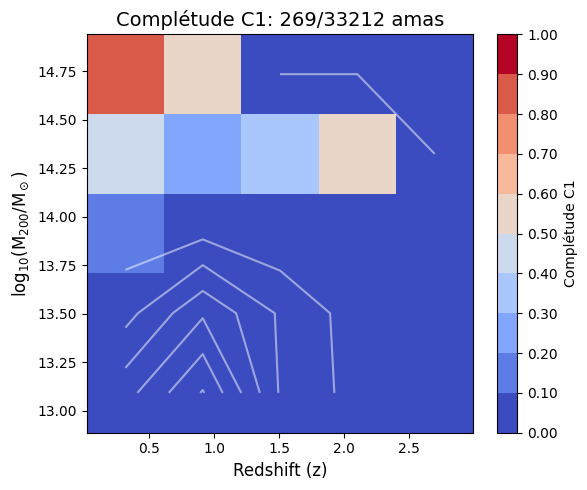

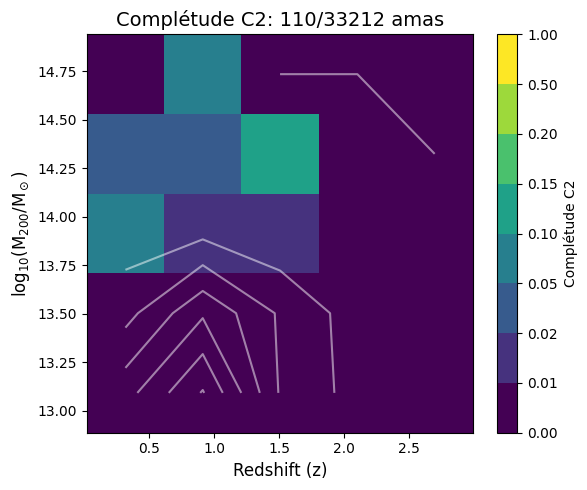

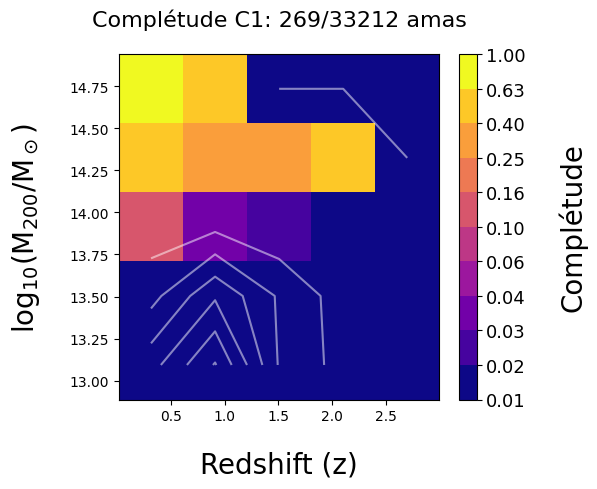

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeC1


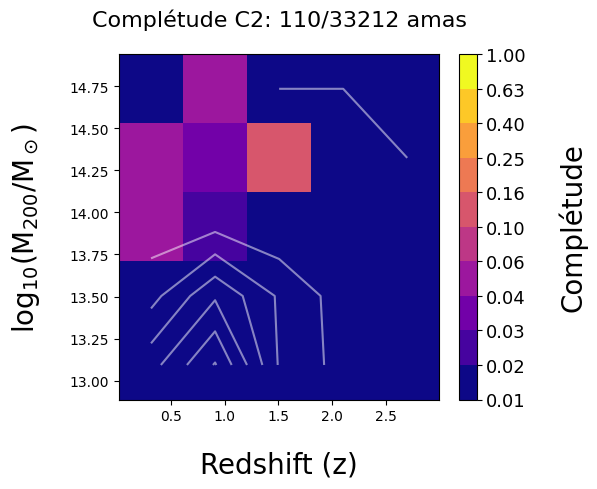

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeC2


In [95]:
BarreCouleurContinue = False
DimensionsGraphe = (6,5)

if(BarreCouleurContinue):
    plot_completeness_ratio_CouleursContinues(data_total=data_befXamin,
                            data_detected=data_match_clusters,
                            class_cond=cond_C1,
                            z_bins=5, 
                            m200_bins=5, 
                            class_name="C1", 
                            cmap='plasma', 
                            figsize=DimensionsGraphe)

    plot_completeness_ratio_CouleursContinues(data_total=data_befXamin,
                        data_detected=data_match_clusters,
                        class_cond=cond_C2,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="C2", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)

else:
    plot_completeness_ratio_CouleursDiscontinues(data_total=data_befXamin,
                            data_detected=data_match_clusters,
                            class_cond=cond_C1,
                            z_bins=5, 
                            m200_bins=5, 
                            class_name="C1", 
                            cmap='coolwarm', 
                            figsize=DimensionsGraphe)

    plot_completeness_ratio_CouleursDiscontinues(data_total=data_befXamin,
                        data_detected=data_match_clusters,
                        class_cond=cond_C2,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="C2", 
                        cmap='viridis', 
                        figsize=DimensionsGraphe,
                        completeness_bins=[0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0])
    
    plot_completeness_ratio_CouleursDiscontinues_log(data_total=data_befXamin,
                        data_detected=data_match_clusters,
                        nom_graphe = "CompletudeC1",
                        class_cond=cond_C1,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="C1", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)
    
    plot_completeness_ratio_CouleursDiscontinues_log(data_total=data_befXamin,
                        data_detected=data_match_clusters,
                        nom_graphe = "CompletudeC2",
                        class_cond=cond_C2,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="C2", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)


In [96]:
def plot_completeness_ratio_Transformer_CouleursContinues(data_total, data_detected,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8)):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    
    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters (filtered by class_cond)
    detected_counts, _, _ = np.histogram2d(z_detected, 
                                         m200_detected,
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness
    plt.pcolormesh(xedges, yedges, completeness.T,
                 cmap=cmap, vmin=0, vmax=1)
    cb = plt.colorbar(label=f'Complétude {class_name}')
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
     
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=12)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=12)
    plt.title(f'Complétude {class_name}: {len(data_detected)}/{len(data_total)} clusters',
             fontsize=14)
    
    plt.tight_layout()
    plt.show()

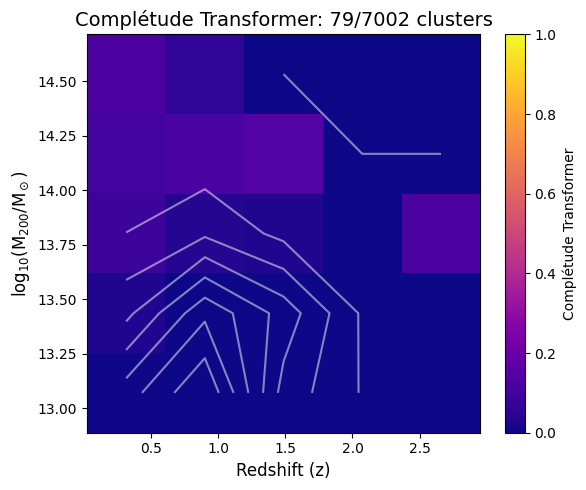

In [97]:
DEC_LIM_FOR_TRAINING = 2.15 # en degres 

mask_for_training = data_befXamin['Dec'] > DEC_LIM_FOR_TRAINING # en degres
data_befXamin_test = data_befXamin[~mask_for_training]


# Chargement des tables d'amas correles
path_amas_trouve_ProbaMax = os.path.expanduser(f'/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/AmasDetectes_ProbaMax.fits')
data_amas_trouve_ProbaMax = Table.read(path_amas_trouve_ProbaMax)

path_amas_trouve_pureteC1 = os.path.expanduser(f'/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/AmasDetectes_pureteC1_seuil0.6831.fits')
data_amas_trouve_pureteC1 = Table.read(path_amas_trouve_pureteC1)

path_amas_trouve_pureteC2 = os.path.expanduser(f'/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/AmasDetectes_pureteC2_seuil0.3052.fits')
data_amas_trouve_pureteC2 = Table.read(path_amas_trouve_pureteC2)


path_amas_trouve_pureteNEWC2 = os.path.expanduser(f'/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/AmasDetectes_pureteNEWC2_seuil0.5486.fits')
data_amas_trouve_pureteNEWC2 = Table.read(path_amas_trouve_pureteNEWC2)

plot_completeness_ratio_Transformer_CouleursContinues(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_ProbaMax,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)

In [98]:
def plot_completeness_ratio_Transformer_CouleursDiscontinues(data_total, data_detected,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8),
                           completeness_bins=None):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    
    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    completeness_bins : int or array-like or None
        If int, number of discrete bins for completeness (0-1)
        If array-like, bin edges for completeness
        If None, defaults to 10 bins
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters (filtered by class_cond)
    detected_counts, _, _ = np.histogram2d(z_detected, 
                                         m200_detected,
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Set up discrete color bins
    if completeness_bins is None:
        completeness_bins = 10
    if isinstance(completeness_bins, int):
        bins = np.linspace(0, 1, completeness_bins + 1)
    else:
        bins = np.asarray(completeness_bins)
    
    # Create discrete colormap
    norm = BoundaryNorm(bins, ncolors=256)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness with discrete colors
    mesh = plt.pcolormesh(xedges, yedges, completeness.T,
                        cmap=cmap, norm=norm)
    
    # Add colorbar with discrete ticks
    cb = plt.colorbar(mesh, label=f'Complétude {class_name}', 
                     ticks=bins, boundaries=bins)
    cb.set_ticklabels([f"{x:.2f}" for x in bins])
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
    
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=12)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=12)
    plt.title(f'Complétude {class_name}: {len(data_detected)}/{len(data_total)} amas',
             fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [99]:
def plot_completeness_ratio_Transformer_CouleursDiscontinues_log(data_total, data_detected, nom_graphe,
                           z_bins=10, m200_bins=10, 
                           class_name="C1", cmap='plasma', figsize=(10, 8),
                           completeness_bins=None, log_min=0.01):
    """
    Plot completeness as ratio of detected clusters to total clusters in bins of log(m200) vs z.
    Uses logarithmic scale for completeness values with discrete color bins.

    Parameters:
    -----------
    data_total : astropy.table.Table
        Table containing ALL clusters (input sample) with 'm200' and 'z' columns
    data_detected : astropy.table.Table
        Table containing DETECTED clusters with 'm200' and 'z' columns
    z_bins : int or array-like
        Bins for redshift
    m200_bins : int or array-like
        Bins for log10(m200)
    class_name : str
        Name of the class for labeling
    cmap : str
        Colormap
    figsize : tuple
        Figure size
    completeness_bins : int or array-like or None
        If int, number of discrete bins for completeness (log scale)
        If array-like, bin edges for completeness (log scale)
        If None, defaults to 10 bins
    log_min : float
        Minimum completeness value for log scale (to avoid log(0))
    """
    
    # Prepare data
    m200_total = np.log10(data_total['m200'])
    z_total = data_total['z']
    
    m200_detected = np.log10(data_detected['m200'])
    z_detected = data_detected['z']
    
    # Create common bins
    if isinstance(z_bins, int):
        z_bins = np.linspace(min(np.min(z_total), np.min(z_detected)),
                            max(np.max(z_total), np.max(z_detected)),
                            z_bins + 1)
    
    if isinstance(m200_bins, int):
        m200_bins = np.linspace(min(np.min(m200_total), np.min(m200_detected)),
                               max(np.max(m200_total), np.max(m200_detected)),
                               m200_bins + 1)
    
    # Histogram of total clusters
    total_counts, xedges, yedges = np.histogram2d(z_total, m200_total,
                                                bins=[z_bins, m200_bins])
    
    # Histogram of detected clusters
    detected_counts, _, _ = np.histogram2d(z_detected, 
                                         m200_detected,
                                         bins=[xedges, yedges])
    
    # Calculate completeness ratio
    completeness = np.divide(detected_counts, total_counts,
                           out=np.zeros_like(detected_counts, dtype=float),
                           where=(total_counts > 0))
    
    # Apply logarithmic transformation with minimum cutoff
    log_completeness = np.log10(np.maximum(completeness, log_min))
    log_min_val = np.log10(log_min)
    log_max_val = 0  # log10(1) = 0
    
    # Set up discrete color bins in log space
    if completeness_bins is None:
        completeness_bins = 10
    if isinstance(completeness_bins, int):
        bins_log = np.linspace(log_min_val, log_max_val, completeness_bins + 1)
    else:
        bins_log = np.log10(np.asarray(completeness_bins))
    
    # Create discrete colormap in log space
    norm = BoundaryNorm(bins_log, ncolors=256)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Plot completeness with discrete colors in log scale
    mesh = plt.pcolormesh(xedges, yedges, log_completeness.T,
                        cmap=cmap, norm=norm)
    
    # Create colorbar with log-ticks
    cb = plt.colorbar(mesh, label=f'Complétude {class_name} (échelle log)',
                     ticks=bins_log)
    
    # Convert log values back to linear for tick labels
    tick_labels = [f"{10**x:.2f}" for x in bins_log]
    cb.set_ticklabels(tick_labels)
    cb.set_label(f'Complétude', fontsize=20, labelpad=23) #{class_name}
    cb.ax.tick_params(labelsize=13)
    
    # Add contours showing total cluster distribution
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                      yedges[:-1] + np.diff(yedges)/2)
    plt.contour(X, Y, total_counts.T, colors='white', alpha=0.5)
    
    # Labels and title
    plt.xlabel('Redshift (z)', fontsize=20, labelpad=20)
    plt.ylabel(r'log$_{10}$(M$_{200}$/M$_\odot$)', fontsize=20, labelpad=20)
    plt.title(f'Complétude {class_name}: {len(data_detected)}/{len(data_total)} amas', fontsize=16, pad=20)
    
    plt.tick_params(axis='both', which='both', labelsize=13)
    plt.tight_layout()
    plot_path = "/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/"+nom_graphe
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Plot saved to: {plot_path}")

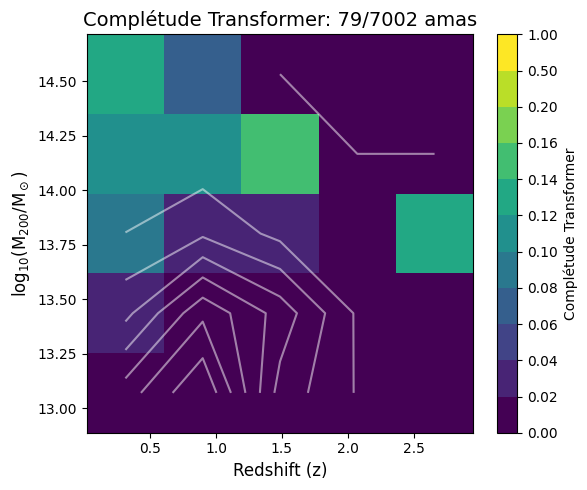

In [100]:
plot_completeness_ratio_Transformer_CouleursDiscontinues(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_ProbaMax,
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='viridis', 
                        figsize=DimensionsGraphe,
                        completeness_bins=[0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2, 0.5, 1.0])

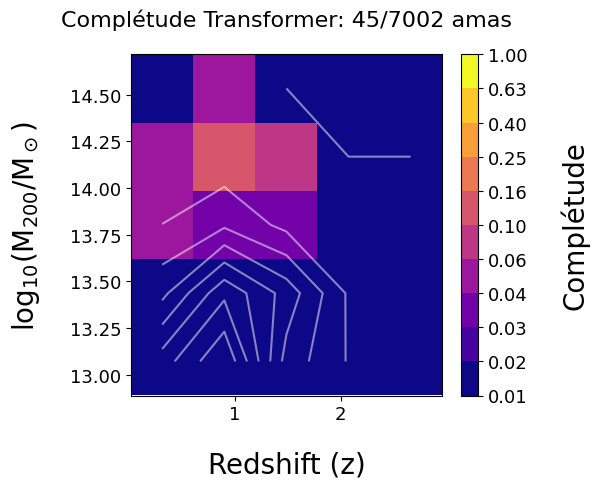

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeTransformerPureteC1


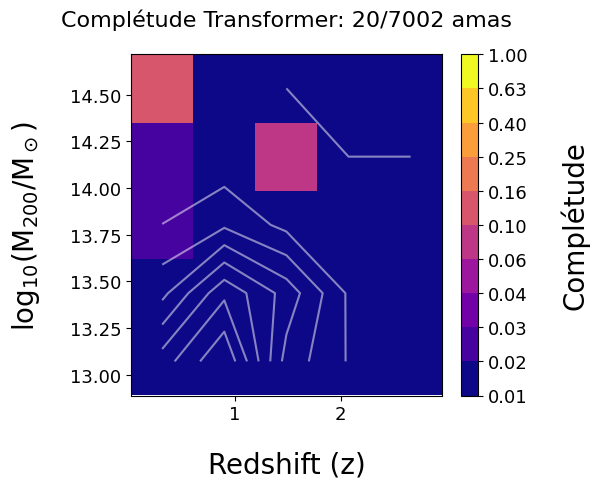

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeTransformerPureteC2


In [101]:
'''
plot_completeness_ratio_Transformer_CouleursDiscontinues_log(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_ProbaMax,
                        nom_graphe = "CompletudeTransformerProbaMax",
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)
'''

plot_completeness_ratio_Transformer_CouleursDiscontinues_log(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_pureteC1,
                        nom_graphe = "CompletudeTransformerPureteC1",
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)
'''
plot_completeness_ratio_Transformer_CouleursDiscontinues_log(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_pureteC2,
                        nom_graphe = "CompletudeTransformerPureteC2",
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)
'''

plot_completeness_ratio_Transformer_CouleursDiscontinues_log(data_total=data_befXamin_test,
                        data_detected=data_amas_trouve_pureteNEWC2,
                        nom_graphe = "CompletudeTransformerPureteC2",
                        z_bins=5, 
                        m200_bins=5, 
                        class_name="Transformer", 
                        cmap='plasma', 
                        figsize=DimensionsGraphe)

Total dans le catalogue data_clusters : 441

Nombre d'amas dans la classe C1 (EXT>13 ET EXT_LIKE>=80): 59
Nombre d'amas dans la classe C2 (EXT>13 ET 35<EXT_LIKE<80): 8
Nombre d'amas ni dans C1, ni dans C2: 374


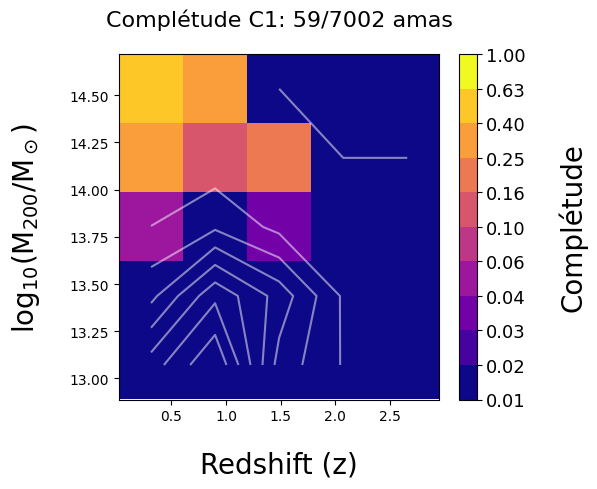

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeC1


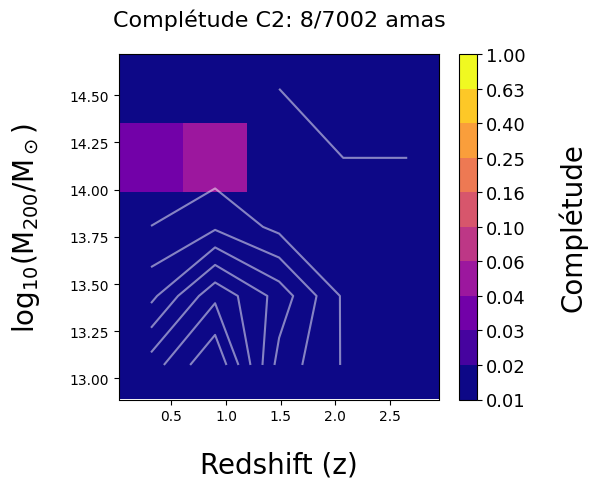

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/CompletudeC2


In [110]:
mask_for_training2 = data_match_clusters['Dec'] > DEC_LIM_FOR_TRAINING # en degres
data_match_clusters_test = data_match_clusters[~mask_for_training2]

cond_C1, cond_C2 = FabriqueC1C2(data_match_clusters_test, EXT_C1_C2_new, EXT_LIKE_C1_new, EXT_LIKE_C2_new)

plot_completeness_ratio_CouleursDiscontinues_log(data_total=data_befXamin_test,
                    data_detected=data_match_clusters_test,
                    nom_graphe = "CompletudeC1",
                    class_cond=cond_C1,
                    z_bins=5, 
                    m200_bins=5, 
                    class_name="C1", 
                    cmap='plasma', 
                    figsize=DimensionsGraphe)

plot_completeness_ratio_CouleursDiscontinues_log(data_total=data_befXamin_test,
                    data_detected=data_match_clusters_test,
                    nom_graphe = "CompletudeC2",
                    class_cond=cond_C2,
                    z_bins=5, 
                    m200_bins=5, 
                    class_name="C2", 
                    cmap='plasma', 
                    figsize=DimensionsGraphe)

In [103]:
def plot_cluster_distribution(data, nom_graphe, z_bins=10, m200_bins=10, 
                            cmap='viridis', figsize=(8, 6), 
                            title='Distribution des amas en fonction de z et M$_{200}$',
                            contour_levels=5, 
                            add_text=True,
                            norm='log'):  # Nouveau paramètre: 'log', None, ou Normalize()
    """
    Plot the 2D distribution of all clusters in log(m200) vs z space.
    
    Parameters:
    -----------
    data : astropy.table.Table
        Table containing cluster data with 'm200' and 'z' columns
    nom_graphe : str
        Output filename for the plot
    z_bins : int or array-like
        Number of bins or bin edges for redshift
    m200_bins : int or array-like
        Number of bins or bin edges for log10(m200)
    cmap : str
        Matplotlib colormap name
    figsize : tuple
        Figure size
    contour_levels : int or array-like
        Number or values for contour levels
    add_text : bool
        Whether to add text with total number of clusters
    norm : str or matplotlib.colors.Normalize
        Normalization for the colormap ('log', None, or Normalize object)
        
    Returns:
    --------
    norm_used : matplotlib.colors.Normalize
        The normalization object used for the color scale
    """
    
    # Prepare data
    m200 = np.log10(data['m200'])
    z = data['z']
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Set up normalization
    if norm == 'log':
        norm_used = LogNorm()
    elif norm is None:
        norm_used = None
    elif isinstance(norm, Normalize):
        norm_used = norm
    else:
        raise ValueError("norm must be 'log', None, or a Normalize object")
    
    # Create 2D histogram
    counts, xedges, yedges, im = plt.hist2d(z, m200, 
                                           bins=[z_bins, m200_bins],
                                           cmap=cmap,
                                           norm=norm_used)  # Utilise la norme
    
    # Add colorbar
    cb = plt.colorbar(im, label='Nombre d\'amas')
    cb.set_label('Nombre d\'amas', fontsize=20, labelpad=23)
    cb.ax.tick_params(labelsize=20)
    
    # Add contours
    X, Y = np.meshgrid(xedges[:-1] + np.diff(xedges)/2, 
                       yedges[:-1] + np.diff(yedges)/2)
    contours = plt.contour(X, Y, counts.T, 
                          levels=contour_levels, 
                          colors='white', linewidths=1)
    plt.clabel(contours, inline=True, fontsize=15, fmt='%d')
    
    # Labels and title
    plt.xlabel('Redshift z', fontsize=20, labelpad=20)
    plt.ylabel(r'log$_{10}$(M$_{200}$ / M$_\odot$)', fontsize=20, labelpad=20)
    
    # Add text with total number of clusters
    if add_text:
        plt.text(0.95, 0.95, f'N = {len(data)}', 
                transform=plt.gca().transAxes,
                ha='right', va='top', fontsize=15,
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plot_path = "/local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/" + nom_graphe
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Plot saved to: {plot_path}")
    
    return norm_used  # Renvoie la norme utilisée

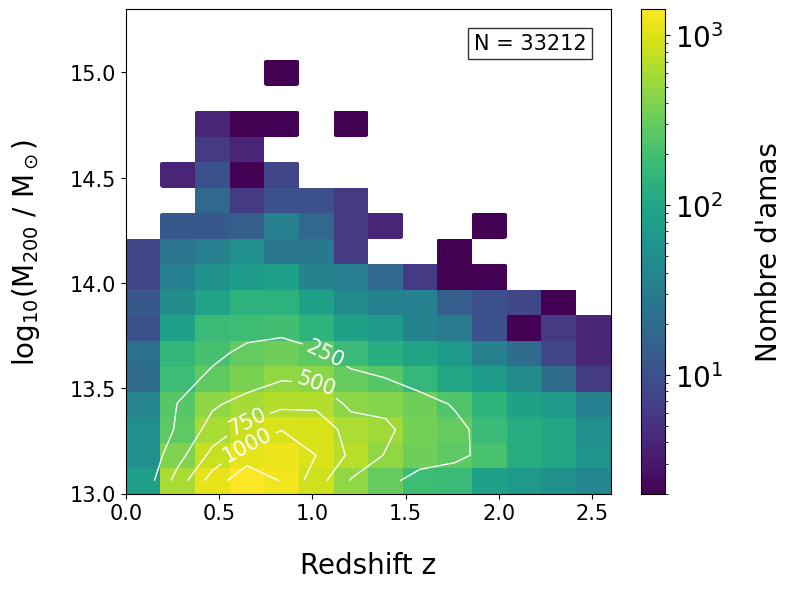

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Hist_M200_z_TousLesAmas


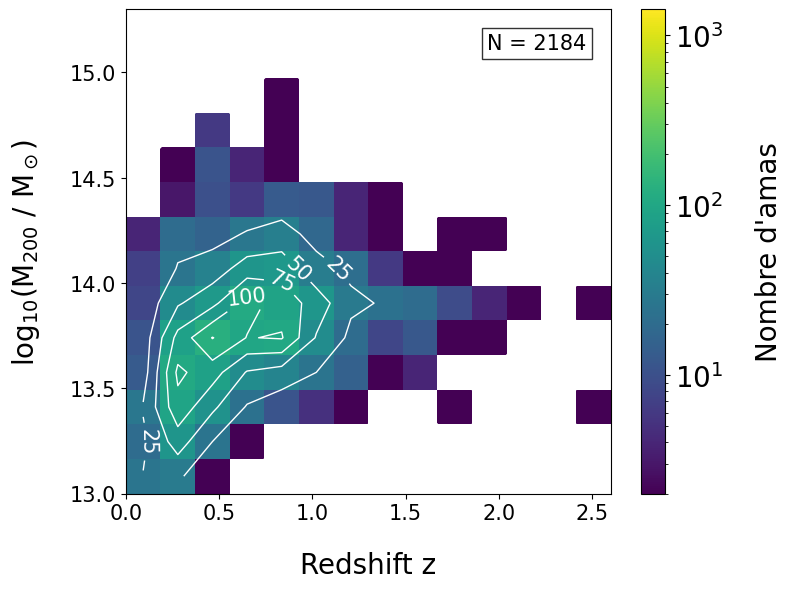

Plot saved to: /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Hist_M200_z_AmasCorreles


In [104]:
norm = plot_cluster_distribution(data_befXamin, nom_graphe = "Hist_M200_z_TousLesAmas",
                        z_bins=np.linspace(0, 2.6, 15),
                        m200_bins=np.linspace(13, 15.3, 20),
                        title = 'Distribution de tous les amas',
                        contour_levels=5)

plot_cluster_distribution(data_match_clusters, nom_graphe = "Hist_M200_z_AmasCorreles",
                        z_bins=np.linspace(0, 2.6, 15),
                        m200_bins=np.linspace(13, 15.3, 15),
                        title = 'Distribution des amas correlés avec une source Xamin',
                        contour_levels=5,
                        norm=norm)

_____
_____

# **Sauvegarde des donnees relatives aux amas avec les colonnes M200 et z**

In [105]:
# Chargement des tables
path_match_clusters_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
path_match_clusters_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')

data_match_clusters_sim2 = Table.read(path_match_clusters_sim2)
data_match_clusters_sim3 = Table.read(path_match_clusters_sim3)

print(f"\n\033[1m{'Simulation 2'.upper()}\033[0m : Amas: {len(data_match_clusters_sim2)}")
print(f"\033[1m{'Simulation 3'.upper()}\033[0m : Amas: {len(data_match_clusters_sim3)}")

max_val2 = data_match_clusters_sim2['ID_Xamin'].max()
# De combien on re-indice ID_Xamin
NbreSources2 = max_val2 + 1
# Simulation 3
data_match_clusters_sim3['ID_Xamin'] += NbreSources2

Colonnes_utiles_AMAS = noms_colonnes_Xamin + ['R.A.', 'Dec', 'flux_ABS', 'm200', 'z']

data_match_clusters_sim2 = data_match_clusters_sim2[Colonnes_utiles_AMAS]
data_match_clusters_sim3 = data_match_clusters_sim3[Colonnes_utiles_AMAS]

data_match_clusters = vstack([data_match_clusters_sim2, data_match_clusters_sim3])
data_match_clusters.meta.clear()

print(f'\nAmas : {len(data_match_clusters)}')

output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_with_m200_z.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog - C1'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters)} lignes x {len(data_match_clusters.columns)} colonnes")


SIMULATION 2 : Amas: 1076
SIMULATION 3 : Amas: 1108

Amas : 2184
Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks_with_m200_z.fits
Dimensions : 2184 lignes x 118 colonnes


In [106]:
data_match_clusters[0]

BOX_ID_SRC,INST0,BAND0,INST1,BAND1,INST0_EXP,INST1_EXP,INST0_GAPFLAG,INST1_GAPFLAG,GAP_NEIGHBOUR,INPUT_X_IMA,INPUT_Y_IMA,PNT_DET_ML,EXT_DET_ML,EPN_DET_ML,DBL_DET_ML,EPN_ML_EXT,PNT_X_IMA,PNT_X_IMA_ERR,PNT_Y_IMA,PNT_IMA_ERR,PNT_RA,PNT_DEC,PNT_RADEC_ERR,PNT_RATE_MOS,PNT_RATE_MOS_ERR,PNT_RATE_PN,PNT_RATE_PN_ERR,PNT_SCTS_MOS,PNT_SCTS_MOS_ERR,PNT_SCTS_PN,PNT_SCTS_PN_ERR,PNT_BG_MAP_MOS,PNT_BG_MAP_PN,PNT_PIX_DEV,PNT_N_ITER,PNT_CUTRAD,EXT_LIKE,EXT,EXT_ERR,EXT_X_IMA,EXT_X_IMA_ERR,EXT_Y_IMA,EXT_Y_IMA_ERR,EXT_RA,EXT_DEC,EXT_RADEC_ERR,EXT_RATE_MOS,EXT_RATE_MOS_ERR,EXT_RATE_PN,EXT_RATE_PN_ERR,EXT_SCTS_MOS,EXT_SCTS_MOS_ERR,EXT_SCTS_PN,EXT_SCTS_PN_ERR,EXT_BG_MAP_MOS,EXT_BG_MAP_PN,EXT_PIX_DEV,EXT_N_ITER,EXT_CUTRAD,EPN_LIKE_EXT,EPN_LIKE_PNT,EPN_EXT,EPN_EXT_ERR,EPN_RATIO,EPN_RATIO_ERR,EPN_X_IMA,EPN_X_IMA_ERR,EPN_Y_IMA,EPN_Y_IMA_ERR,EPN_RA,EPN_DEC,EPN_RADEC_ERR,EPN_RATE_MOS,EPN_RATE_MOS_ERR,EPN_RATE_PN,EPN_RATE_PN_ERR,EPN_SCTS_MOS,EPN_SCTS_MOS_ERR,EPN_SCTS_PN,EPN_SCTS_PN_ERR,EPN_BG_MAP_MOS,EPN_BG_MAP_PN,EPN_PIX_DEV,EPN_N_ITER,EPN_CUTRAD,DBL_LIKE,DBL_SEP,DBL_SEP_ERR,DBL_RATIO,DBL_RATIO_ERR,DBL_THETA,DBL_X_IMA,DBL_X_IMA_ERR,DBL_Y_IMA,DBL_Y_IMA_ERR,DBL_RA,DBL_DEC,DBL_RADEC_ERR,DBL_RATE_MOS,DBL_RATE_MOS_ERR,DBL_RATE_PN,DBL_RATE_PN_ERR,DBL_SCTS_MOS,DBL_SCTS_MOS_ERR,DBL_SCTS_PN,DBL_SCTS_PN_ERR,DBL_BG_MAP_MOS,DBL_BG_MAP_PN,DBL_PIX_DEV,DBL_N_ITER,DBL_CUTRAD,ID_Xamin,R.A.,Dec,flux_ABS,m200,z
int32,bytes8,bytes8,bytes8,bytes8,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int64,float64,float64,float64,float64,float64
1512,MOS,b2,PN,b2,62960.028203125,32684.128046875,44,36,1,1219.0000000000075,521.9999999999862,102.25138758207686,98.43377813173014,97.55826975337159,97.10360341868628,-2.9514683007641906,1219.0000000000075,--,521.9999999999862,--,147.0299589940846,1.5458157530603327,--,0.00038087592193958324,--,0.0012206056992471585,--,24.081484182148387,--,40.02626743355748,--,0.029629628223764505,0.07673368303516563,0.0,16,37.4439582824707,2.8949697994689814,0.14789759355284304,--,1219.4142358653557,--,521.3894086203109,--,147.03024669054656,1.5453917038010716,--,0.00032592573868116855,--,0.0007462845668189772,--,28.911720952091095,--,34.41811438761854,--,0.02711518950958298,0.08263079454509091,0.5031645245934449,136,37.4439582824707,0.0,0.0,55.847676658532905,--,2.985515096574524,--,1219.0000000000075,--,521.9999999999862,--,147.0299589940846,1.5458157530603327,--,0.0004022827114046883,--,0.0013046309806399965,--,25.535094613502725,--,41.923612151009394,--,0.02887293356923336,0.07473857817980085,0.0,141,37.4439582824707,0.0,2.1122616518355253,--,0.0010000568020117548,--,3.7609161636009307e-121,1219.020079690481,--,521.7020596565873,--,147.0299729120835,1.545608853306471,--,0.0003743220049596883,--,0.0012332843991278407,--,24.232561812957183,--,40.34721020991466,--,0.029550982918814583,0.07639620377506344,0.0,79,37.4439582824707,1441,147.02345275878906,1.5497878789901731,6.06e-15,17048999559168.0,0.089


_____
_____

# **Sauvegarde des donnees relatives aux amas C1 et C2 pour les simulations 1 et 2**

# Nouvelles limites pour C1 et C2

In [107]:
# Chargement des tables d'amas correles
path_match_clusters_sim2 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation2/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
data_match_clusters_sim2 = Table.read(path_match_clusters_sim2)

path_match_clusters_sim3 = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/Simulation3/PrivilegeAmas/Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_filtered.fits')
data_match_clusters_sim3 = Table.read(path_match_clusters_sim3)

print(f"\n\033[1m{'Simulation 2'.upper()}\033[0m : Amas: {len(data_match_clusters_sim2)}")
print(f"\n\033[1m{'Simulation 3'.upper()}\033[0m : Amas: {len(data_match_clusters_sim3)}")


SIMULATION 2 : Amas: 1076

SIMULATION 3 : Amas: 1108


In [108]:
# Définition des classes C1 et C2
cond_C1 = np.logical_and((data_match_clusters_sim2['EXT'] > EXT_C1_C2_new) , (data_match_clusters_sim2['EXT_LIKE'] >= EXT_LIKE_C1_new))
cond_C2 = np.logical_and(np.logical_and((data_match_clusters_sim2['EXT'] > EXT_C1_C2_new) , (data_match_clusters_sim2['EXT_LIKE'] < EXT_LIKE_C1_new))
                          , (data_match_clusters_sim2['EXT_LIKE'] > EXT_LIKE_C2_new))

n_C1 = sum(cond_C1)
n_C2 = sum(cond_C2)
ni_C1_ni_C2 = len(data_match_clusters_sim2) - (n_C1+n_C2)

print("="*70)
print(f"Total dans le catalogue data_match_clusters_sim2 : {len(data_match_clusters_sim2)}")
print(f"\nNombre d'amas dans la classe C1 (EXT>{EXT_C1_C2_new} ET EXT_LIKE>={EXT_LIKE_C1_new}): {n_C1}")
print(f"Nombre d'amas dans la classe C2 (EXT>{EXT_C1_C2_new} ET {EXT_LIKE_C2_new}<EXT_LIKE<{EXT_LIKE_C1_new}): {n_C2}")
print(f"Nombre d'amas ni dans C1, ni dans C2: {ni_C1_ni_C2}")
print("="*70)

#///////////////////////////////////////////////////////////////////////////////////////////

data_match_clusters_sim2_C1 = data_match_clusters_sim2[cond_C1]

output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_simulation2_C1.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters_sim2_C1.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog - C1'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters_sim2_C1), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters_sim2_C1)} lignes x {len(data_match_clusters_sim2_C1.columns)} colonnes")

#///////////////////////////////////////////////////////////////////////////////////////////

data_match_clusters_sim2_C2 = data_match_clusters_sim2[cond_C2]

output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_simulation2_C2.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters_sim2_C2.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog - C2'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters_sim2_C2), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters_sim2_C2)} lignes x {len(data_match_clusters_sim2_C2.columns)} colonnes")


Total dans le catalogue data_match_clusters_sim2 : 1076

Nombre d'amas dans la classe C1 (EXT>13 ET EXT_LIKE>=80): 133
Nombre d'amas dans la classe C2 (EXT>13 ET 35<EXT_LIKE<80): 59
Nombre d'amas ni dans C1, ni dans C2: 884
Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks_simulation2_C1.fits
Dimensions : 133 lignes x 131 colonnes
Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks_simulation2_C2.fits
Dimensions : 59 lignes x 131 colonnes


In [109]:
# Définition des classes C1 et C2
cond_C1 = np.logical_and((data_match_clusters_sim3['EXT'] > EXT_C1_C2_new) , (data_match_clusters_sim3['EXT_LIKE'] >= EXT_LIKE_C1_new))
cond_C2 = np.logical_and(np.logical_and((data_match_clusters_sim3['EXT'] > EXT_C1_C2_new) , (data_match_clusters_sim3['EXT_LIKE'] < EXT_LIKE_C1_new))
                          , (data_match_clusters_sim3['EXT_LIKE'] > EXT_LIKE_C2_new))

n_C1 = sum(cond_C1)
n_C2 = sum(cond_C2)
ni_C1_ni_C2 = len(data_match_clusters_sim3) - (n_C1+n_C2)

print("="*70)
print(f"Total dans le catalogue data_match_clusters_sim3 : {len(data_match_clusters_sim3)}")
print(f"\nNombre d'amas dans la classe C1 (EXT>{EXT_C1_C2_new} ET EXT_LIKE>={EXT_LIKE_C1_new}): {n_C1}")
print(f"Nombre d'amas dans la classe C2 (EXT>{EXT_C1_C2_new} ET {EXT_LIKE_C2_new}<EXT_LIKE<{EXT_LIKE_C1_new}): {n_C2}")
print(f"Nombre d'amas ni dans C1, ni dans C2: {ni_C1_ni_C2}")
print("="*70)

#///////////////////////////////////////////////////////////////////////////////////////////

data_match_clusters_sim3_C1 = data_match_clusters_sim3[cond_C1]

output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_simulation3_C1.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters_sim3_C1.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog - C1'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters_sim3_C1), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters_sim3_C1)} lignes x {len(data_match_clusters_sim3_C1.columns)} colonnes")

#///////////////////////////////////////////////////////////////////////////////////////////

data_match_clusters_sim3_C2 = data_match_clusters_sim3[cond_C2]

output_filename = f"Clusters_matches_r{SEARCH_RADIUS_CLUSTER*3600:.0f}arcsec_flux{LIM_FLUX_CLUSTER}_40ks_simulation3_C2.fits"
output_path = os.path.expanduser(f'~/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/{output_filename}')

data_match_clusters_sim3_C2.write(output_path, format='fits', overwrite=True)

with fits.open(output_path, mode='update') as hdul:
    hdr = hdul[1].header
    hdr['COMMENT'] = 'Input CLUSTERS - Output pipeline spatially matched source catalog - C2'
    hdr['R_MATCH'] = (SEARCH_RADIUS_CLUSTER*3600, '[arcsec] Matching radius') 
    hdr['N_MATCH'] = (len(data_match_clusters_sim3_C2), 'Total matched sources')

print(f"Catalogue complet sauvegardé dans : {output_path}")
print(f"Dimensions : {len(data_match_clusters_sim3_C2)} lignes x {len(data_match_clusters_sim3_C2.columns)} colonnes")


Total dans le catalogue data_match_clusters_sim3 : 1108

Nombre d'amas dans la classe C1 (EXT>13 ET EXT_LIKE>=80): 136
Nombre d'amas dans la classe C2 (EXT>13 ET 35<EXT_LIKE<80): 51
Nombre d'amas ni dans C1, ni dans C2: 921
Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks_simulation3_C1.fits
Dimensions : 136 lignes x 131 colonnes
Catalogue complet sauvegardé dans : /local/home/sh275430/Documents/TransformerProject/results/Correl_to_find_spurious/SimulationTOT/PrivilegeAmas/Simulations_2_3/Clusters_matches_r30arcsec_flux1e-15_40ks_simulation3_C2.fits
Dimensions : 51 lignes x 131 colonnes
